# Finding Similar Movies Based on Plot Summaries using Natural Language Processing

### 1. import and observe dataset

In [84]:
# import required libraries
import numpy as np
import pandas as pd
import nltk
import warnings

warnings.filterwarnings("ignore")

# setting up seed for reproducibility
np.random.seed(9)

In [85]:
# read data from csv file
movies = pd.read_csv('movies.csv')

print("Number of movies in dataset:", len(movies))
movies.head()

Number of movies in dataset: 100


,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [86]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       100 non-null    int64 
 1   title      100 non-null    object
 2   genre      100 non-null    object
 3   wiki_plot  100 non-null    object
 4   imdb_plot  90 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


### 2. combine plots (wiki and imdb)

In [87]:
# new column plot = imdb plot + wiki plot
movies["plot"] = movies["imdb_plot"].astype('str') + "\n" + movies["wiki_plot"].astype('str')
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       100 non-null    int64 
 1   title      100 non-null    object
 2   genre      100 non-null    object
 3   wiki_plot  100 non-null    object
 4   imdb_plot  90 non-null     object
 5   plot       100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","In the early years of World War II, December 1..."


### 3. tokenization

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
# example: 
# the grandfather plot = gf
gf = movies.iloc[0]["plot"]

# 1. tokenize a paragraph into sentences
sent_tokenized = [sent for sent in nltk.sent_tokenize(gf)]
# 2. tokenize words from a sentence from sent_tokenized
word_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[3])]
# 3. remove tokens without words from word_tokenized
import re

filtered = [word for word in word_tokenized if re.search('[a-zA-Z]', word)]
print(filtered)

['One', 'of', 'the', 'men', 'who', 'asks', 'the', 'Don', 'for', 'a', 'favor', 'is', 'Amerigo', 'Bonasera', 'a', 'successful', 'mortician', 'and', 'acquaintance', 'of', 'the', 'Don', 'whose', 'daughter', 'was', 'brutally', 'beaten', 'by', 'two', 'young', 'men', 'because', 'she', 'refused', 'their', 'advances', 'the', 'men', 'received', 'minimal', 'punishment']


### 4. stemming

In [90]:
# use SnowballStemmer for stemming
from nltk.stem.snowball import SnowballStemmer

# create an english language SnowballStemmer object
stemmer = SnowballStemmer("english")

# stem words filtered prior
stemmed_words = [stemmer.stem(word) for word in filtered]

print(filtered)
print(stemmed_words)

setarr = set([word.lower() for word in filtered])
print([[word for word in stemmed_words if word.lower() not in setarr]])

['One', 'of', 'the', 'men', 'who', 'asks', 'the', 'Don', 'for', 'a', 'favor', 'is', 'Amerigo', 'Bonasera', 'a', 'successful', 'mortician', 'and', 'acquaintance', 'of', 'the', 'Don', 'whose', 'daughter', 'was', 'brutally', 'beaten', 'by', 'two', 'young', 'men', 'because', 'she', 'refused', 'their', 'advances', 'the', 'men', 'received', 'minimal', 'punishment']
['one', 'of', 'the', 'men', 'who', 'ask', 'the', 'don', 'for', 'a', 'favor', 'is', 'amerigo', 'bonasera', 'a', 'success', 'mortician', 'and', 'acquaint', 'of', 'the', 'don', 'whose', 'daughter', 'was', 'brutal', 'beaten', 'by', 'two', 'young', 'men', 'becaus', 'she', 'refus', 'their', 'advanc', 'the', 'men', 'receiv', 'minim', 'punish']
[['ask', 'success', 'acquaint', 'brutal', 'becaus', 'refus', 'advanc', 'receiv', 'minim', 'punish']]


### 5. tokenize and stem function

In [91]:
def tokenize_stem(para):

    # tokenize by sentence and then by word
    
    word_tokenized = [word for sent in nltk.sent_tokenize(para) for word in nltk.word_tokenize(sent)]
    
    # filter out noise by removing word-less tokens
    filtered = [word for word in word_tokenized if re.search('[a-zA-Z]', word)]

    # stem the tokens
    stems = [stemmer.stem(token) for token in filtered]

    return stems

stemmed_words = tokenize_stem(gf)
# print(stemmed_words)

### 6. TfidVectorizer

In [92]:
# import TfidfVectorizer (Term Frequency-Inverse Document Frequency (TF-IDF) )
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_stem,
                                 ngram_range=(1,4))

### 7. fit transform (movie plots in vectorizer)

In [93]:
tfidf_matrix = tfidf_vectorizer.fit_transform([plot for plot in movies["plot"]])
tfidf_matrix.shape

(100, 564)

### 8. create clusters using kmeans

In [94]:
from sklearn.cluster import KMeans

# kmenas object with 7 clusters
km = KMeans(n_clusters=7)

# fit matrix in clusters
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# new column cluster to denote generated cluster for each movie
movies["cluster"] = clusters

movies["cluster"].value_counts()

cluster
1    25
6    19
4    17
5    16
3    13
0     6
2     4
Name: count, dtype: int64

### 9. calculate similarity distance

In [95]:
# cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

### 10. plot dendogram and create merging

In [96]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

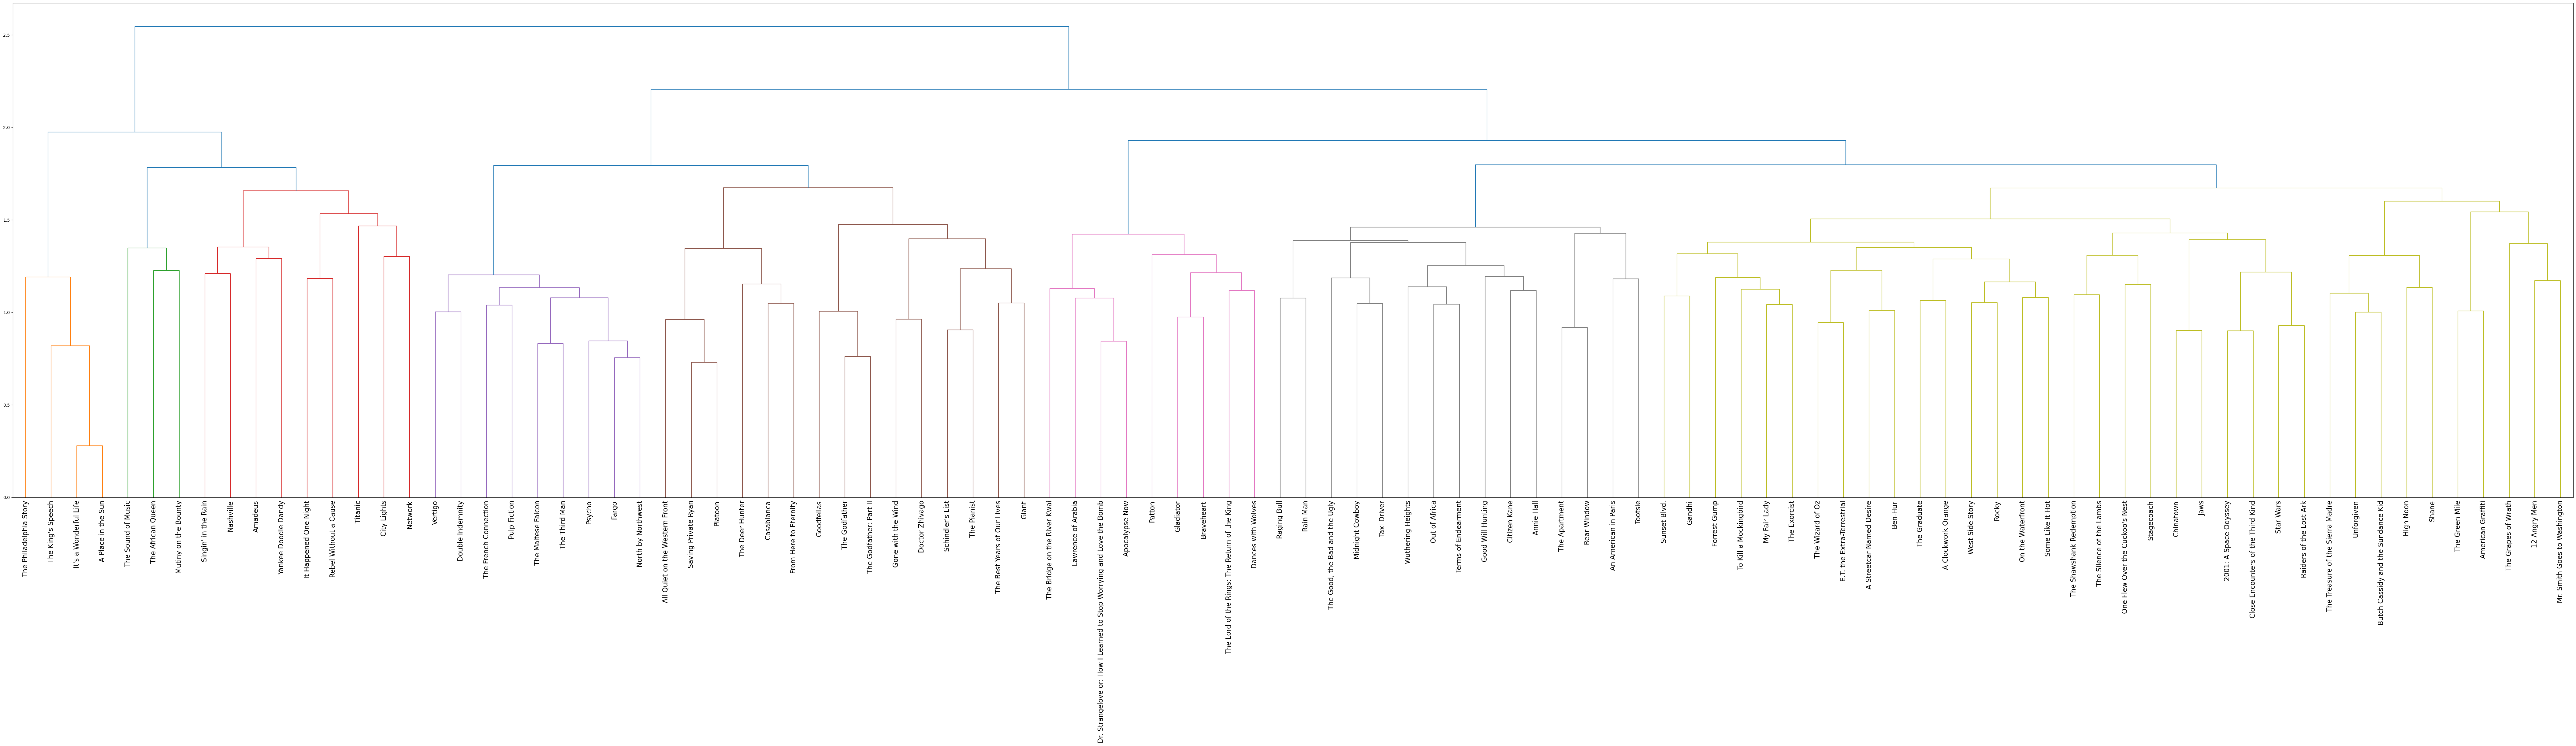

In [97]:
# merging matrix
mergings = linkage(similarity_distance, method='complete')

# plot dendrogram
dendrogram_ = dendrogram(mergings,
               labels=[title for title in movies["title"]],
               leaf_font_size=16,
)

# adjusting plot
fig = plt.gcf()
fig.set_size_inches(108, 21)

plt.show()

### 11. find similar movie using similarity distance

In [98]:
def find_similar(title):
    index = movies[movies['title'] == title].index[0]
    vector = similarity_distance[index, :]
    most_similar = movies.iloc[np.argsort(vector)[1], 1]
    return most_similar
print(find_similar('The Godfather'))

The Godfather: Part II


In [99]:
titles = movies.iloc[:, 1].astype('str').tolist()

similar_movie = {title:find_similar(title) for title in titles}
for key, val in similar_movie.items():
    print(key, "::", val)

The Godfather :: The Godfather: Part II
The Shawshank Redemption :: A Clockwork Orange
Schindler's List :: The Pianist
Raging Bull :: The Godfather: Part II
Casablanca :: From Here to Eternity
One Flew Over the Cuckoo's Nest :: A Clockwork Orange
Gone with the Wind :: The Best Years of Our Lives
Citizen Kane :: The Godfather: Part II
The Wizard of Oz :: E.T. the Extra-Terrestrial
Titanic :: Star Wars
Lawrence of Arabia :: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
The Godfather: Part II :: The Godfather
Psycho :: North by Northwest
Sunset Blvd. :: North by Northwest
Vertigo :: Psycho
On the Waterfront :: The Godfather: Part II
Forrest Gump :: Gone with the Wind
The Sound of Music :: The African Queen
West Side Story :: The Third Man
Star Wars :: 2001: A Space Odyssey
E.T. the Extra-Terrestrial :: Gone with the Wind
2001: A Space Odyssey :: Star Wars
The Silence of the Lambs :: North by Northwest
Chinatown :: Jaws
The Bridge on the River Kwai :: Saving Private 